In [19]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data_2015_16 = pd.read_csv("8358_1.csv")
data_2017_18 = pd.read_csv("Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_May19.csv")

In [21]:
data_2015_16.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [22]:
data_2017_18.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30T05:05:40Z,2019-05-01T15:43:09Z,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03T18:39:49Z,2019-05-01T12:52:25Z,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29T05:08:59Z,2019-05-01T12:52:20Z,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31T02:34:04Z,2019-05-01T12:50:45Z,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


In [23]:
data_2015_16.shape

(3510, 21)

In [24]:
data_2017_18.shape

(10000, 24)

In [105]:
data_2015_16.keys()

Index(['id', 'address', 'categories', 'city', 'country', 'keys', 'latitude',
       'longitude', 'menuPageURL', 'menus.amountMax', 'menus.amountMin',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'name', 'postalCode', 'priceRangeCurrency', 'priceRangeMin',
       'priceRangeMax', 'province'],
      dtype='object')

In [106]:
data_2017_18.keys()

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'menus.amountMax', 'menus.amountMin', 'menus.currency',
       'menus.dateSeen', 'menus.description', 'menus.name', 'name',
       'postalCode', 'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax',
       'province', 'geometry'],
      dtype='object')

In [108]:
count =0
ids_ls =[]
for ids in data_2015_16['id']:
    for j in data_2017_18['id']:
        if ids == j:
            count+=1
            ids_ls.append(ids)

In [112]:
print(count)
print(len(ids_ls))

621
621


# Working on data_2017_18

# checking duplicate ids 

In [50]:
dup_data_2017_18 = data_2017_18.drop_duplicates('id') 
dup_data_2015_16 = data_2015_16.drop_duplicates('id')

In [51]:
dup_data_2017_18.shape

(2285, 24)

In [52]:
dup_data_2015_16.shape

(989, 21)

In [53]:
data_2017_18.keys()

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.currency',
       'menus.dateSeen', 'menus.description', 'menus.name', 'name',
       'postalCode', 'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax',
       'province'],
      dtype='object')

In [54]:
data_2017_18.loc[data_2017_18['id']=='AVwc7s1wIN2L1WUfqehD']

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
14,AVwc7s1wIN2L1WUfqehD,2015-10-21T17:51:11Z,2019-05-01T12:42:05Z,146 N Glendora Ave,"Pizza,Restaurant,Pizza Place",Accommodation & Food Services,Glendora,US,us/ca/glendora/146nglendoraave/-1511428239,34.137502,...,USD,"2018-02-18T15:21:05.726Z,2018-02-27T05:14:30.5...",NaN,Three Cheese Pizza,Domenicos Jr,91741,USD,0,25,CA
15,AVwc7s1wIN2L1WUfqehD,2015-10-21T17:51:11Z,2019-05-01T12:42:05Z,146 N Glendora Ave,"Pizza,Restaurant,Pizza Place",Accommodation & Food Services,Glendora,US,us/ca/glendora/146nglendoraave/-1511428239,34.137502,...,USD,2018-05-11T22:26:10.666Z,Topped with mozzarellaampcomma feta and ricotta,Three Cheese Pizza,Domenicos Jr,91741,USD,0,25,CA
16,AVwc7s1wIN2L1WUfqehD,2015-10-21T17:51:11Z,2019-05-01T12:42:05Z,146 N Glendora Ave,"Pizza,Restaurant,Pizza Place",Accommodation & Food Services,Glendora,US,us/ca/glendora/146nglendoraave/-1511428239,34.137502,...,USD,2018-05-11T22:26:10.666Z,Includes 1 toppingampcomma additional toppings...,Pizza Sandwich,Domenicos Jr,91741,USD,0,25,CA


In [55]:
#data_2017_18['id']

## here the data contains the duplicate ids but every id can be seen as a order and if you order more than 1 item from menu, then this id will be present that many times. 

# checking missing values in dataset

In [69]:
print("Number of absent data : \n{}".format(data_2017_18.isnull().sum()))

Percentage of absent data : 
id                       0
dateAdded                0
dateUpdated              0
address                  0
categories               0
primaryCategories        0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menuPageURL           8321
menus.amountMax          0
menus.amountMin          0
menus.currency           0
menus.dateSeen           0
menus.description     6282
menus.name               0
name                     0
postalCode               4
priceRangeCurrency       0
priceRangeMin            0
priceRangeMax            0
province                 0
dtype: int64


In [71]:
data_2017_18 = data_2017_18.drop(['menuPageURL'],axis=1)

In [72]:
print("Number of absent data : \n{}".format(data_2017_18.isnull().sum()))

Number of absent data : 
id                       0
dateAdded                0
dateUpdated              0
address                  0
categories               0
primaryCategories        0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menus.amountMax          0
menus.amountMin          0
menus.currency           0
menus.dateSeen           0
menus.description     6282
menus.name               0
name                     0
postalCode               4
priceRangeCurrency       0
priceRangeMin            0
priceRangeMax            0
province                 0
dtype: int64


## plotting pizza locations in North America

In [78]:
import geopandas
from shapely.geometry import Point, LineString

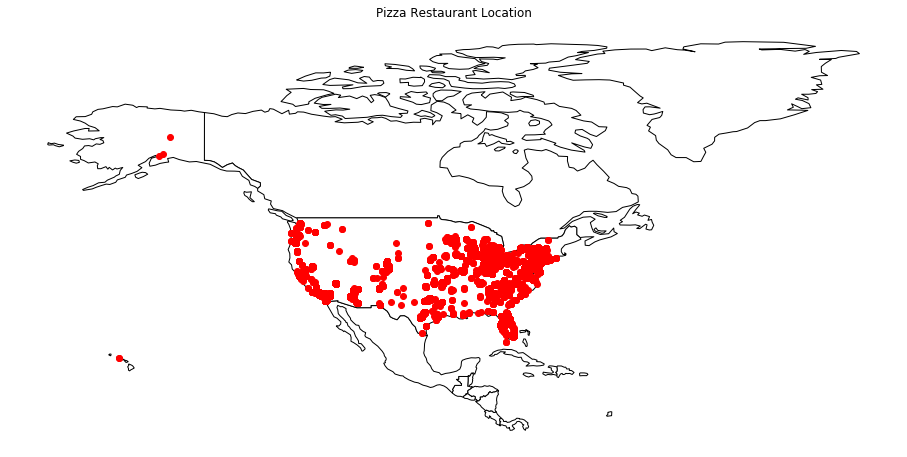

In [81]:
geometry = [Point(xy) for xy in zip(data_2017_18.longitude, data_2017_18.latitude)]

gdf = geopandas.GeoDataFrame(data_2017_18, geometry=geometry)
#print(gdf.head())
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(16, 20))
world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', ax=ax)
ax.set(title='Pizza Restaurant Location')
ax.set_axis_off()

gdf.plot(ax=ax, color='red')

plt.show()

## Which are the top 10 pizzas ?

In [99]:
pizza_menu = data_2017_18['menus.name'].value_counts()
print(pizza_menu[:15])

Cheese Pizza             299
White Pizza              225
Hawaiian Pizza           149
Buffalo Chicken Pizza    112
Pizza                    111
Margherita Pizza         104
Veggie Pizza              95
Bbq Chicken Pizza         81
Greek Pizza               72
Pizza Sub                 71
Pizza Burger              70
Taco Pizza                68
Sicilian Pizza            66
Pizza Steak               55
Pizza Bread               54
Name: menus.name, dtype: int64


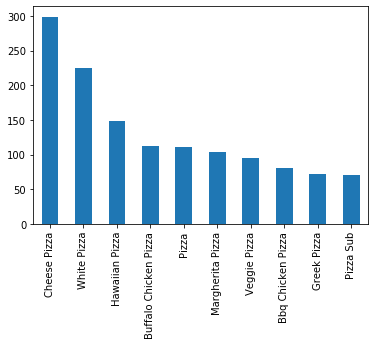

In [100]:
## top 10 pizza's
pizza_menu[:10].plot.bar()

In [101]:
### no. of different pizza
diffPizza = data_2017_18['menus.name'].value_counts()
print("Different pizzas : {}".format(diffPizza.count()))

Different pizzas : 4749


## Which are the top 10 cities with the most pizza restaurant ?

In [102]:
pizza_city = data_2017_18['city'].value_counts()

In [103]:
print(pizza_city[:15])

New York         655
Brooklyn         460
Los Angeles      193
Buffalo          178
Philadelphia     140
Seattle          135
Chicago          133
Flushing         124
San Francisco    110
Bronx             88
Springfield       85
Charlotte         84
Pittsburgh        74
Mesa              73
Austin            66
Name: city, dtype: int64


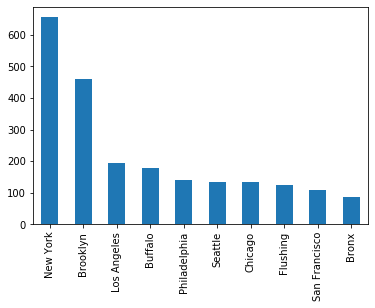

In [104]:
pizza_city[:10].plot.bar()

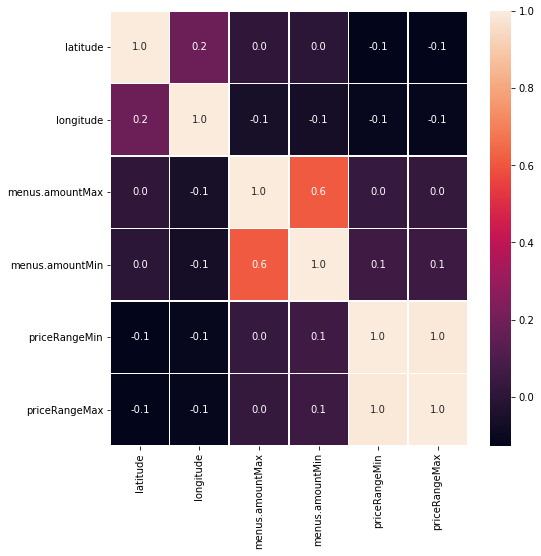

In [95]:
## heatmap
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data_2017_18.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)